머리
     id  Type of tumor   lung capacity  sex  shortness of breath   recurrence  \
0  293              1            2.80    0                     0           0   
1    1              2            2.16    1                     0           0   
2    8              2            2.50    1                     1           0   
3   14              2            3.06    1                     1           0   
4   17              2            1.88    0                     1           0   

   Drinking  Coughing  Asthma  Smoking  degree of pain  Survival  
0         0         0       0        1              62         0  
1         1         1       0        1              60         0  
2         1         0       1        1              66         1  
3         1         1       1        1              80         1  
4         0         0       0        1              56         0  
데이터
       id  Type of tumor   lung capacity  sex  shortness of breath   \
0    293              1            2.8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegr

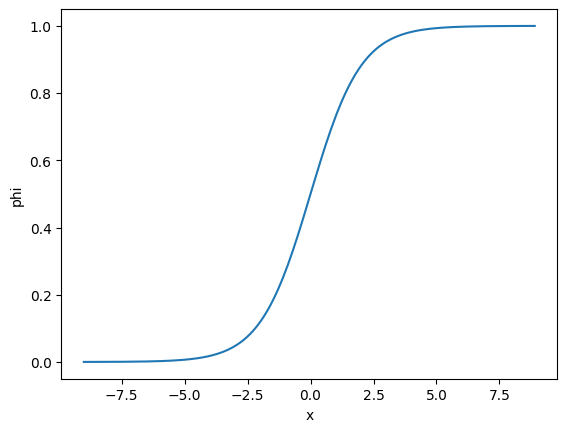

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #평균을 제거하고 데이터를 단위 분산으로 조정한다.
#사이킷런 = 머신러닝 라이브러리
#사이킷런의 로지스틱 회귀 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv("/content/drive/MyDrive/ThoraricSurgery.csv")

print(data.head())
print(data) #[470 rows x 18 columns]

#타겟 데아터 따로 저장
target = data['Survival']

data.drop(labels=['id', 'Survival', 'Type of tumor'], axis=1, inplace=True)  #drop == 열 삭제

print(data)

#훈련 데이터와 테스트 데이터 분리
#train_test_split은 별도 설정 없을 시 훈련 데이터80%, 테스트 데이터 20%
train_input, test_input, train_target, test_target = train_test_split(
    data, target, random_state=40)

ss = StandardScaler()
ss.fit(train_input) #fit() 함수는 모델을 학습시키는 함수입니다. fit() 함수는 입력 데이터와 정답 데이터를 모델에 입력하여 모델의 가중치(weight)를 업데이트합니다. (fit은 반드시 2차원 배열이여야 한다)


train_scaled = ss.transform(train_input)  #data 들의 값을 분산으로 변경
test_scaled = ss.transform(test_input)


#로지스틱 회귀 인스턴스 생성
lr = LogisticRegression()
#훈련 데이터로 모델 훈련
# -> fit()에 훈련 데이터셋을 전달하고 모델을 훈련시킴.
lr.fit(train_input, train_target)

#예측 결과 출력
print("예측",lr.predict(test_input))

#변수 종류 출력
print("변수",data.head(0))
#각 특징(변수, feature)들의 가중치
print("특징",lr.coef_)
# -> 어떤 변수가 결과에 큰 영향을 미치는가

#내가 폐암에 걸렸을 때를 가정한 조건
pred = lr.predict([[2.2, 1, 1, 0, 1, 1, 0, 0, 52]])
pred2 = lr.predict([[2.8, 0, 0, 1, 0, 0, 1, 1, 60]])

if(pred[0] == 0):
    print('AI : case1 사망하실 것으로 예측됩니다.\n')
else:
    print('AI : case1 생존하실 것으로 예측됩니다.\n')

if(pred2[0] == 0):
    print('AI : case2 사망하실 것으로 예측됩니다.\n')
else:
    print('AI : case2 생존하실 것으로 예측됩니다.\n')

#음성 클래스 / 양성 클래스의 확률
print('케이스1 ) 양성 클래스 / 음성 클래스 : {}'.format(lr.predict_proba([[2.2, 1, 0, 0, 1, 1, 1, 0, 52]])))
print('케이스2 ) 양성 클래스 / 음성 클래스 : {}'.format(lr.predict_proba([[2.8, 0, 0, 1, 0, 0, 1, 1, 60]])))

x = np.arange(-9, 9, 0.1)
phi = 1 / (1 + np.exp(-x))

plt.plot(x, phi)
plt.xlabel('x')
plt.ylabel('phi')

plt.show()